# ErSE 394 — Geo-Environmental Modeling & Analysis
## Assignment 3 (Analysis of Hot Spells in Jeddah using In Situ Weather Data)

### Link to the repository: [https://github.com/Sara-Iftikhar/geo_env](https://github.com/Sara-Iftikhar/geo_env)

### Part 01

#### 4. Open the script with your preferred text editor. Begin by importing the necessary packages as in the previous assignment and include tools.py

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import tools

#### 5. Load the Jeddah weather data into a Pandas dataframe using the read isd csv function from tools.py

In [2]:
df_isd = tools.read_isd_csv(os.path.join(os.getcwd(), '41024099999.csv'))

#### 6. Use the following commands to visualize and get an overview of the ISD data for Jeddah

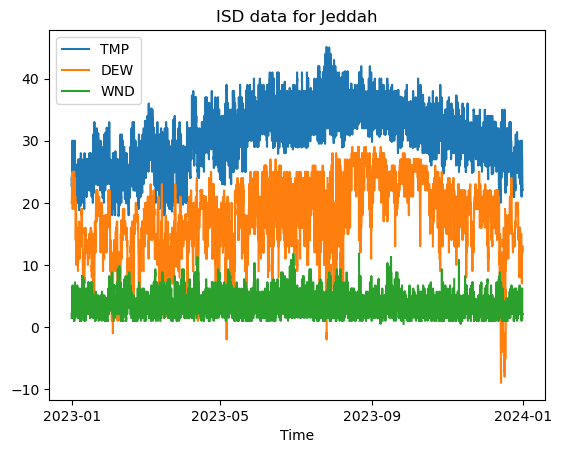

<Axes: title={'center': 'ISD data for Jeddah'}, xlabel='Time'>

In [3]:
from easy_mpl import plot
plot(df_isd,           
     ax_kws=dict(
                xlabel="Time",
                title='ISD data for Jeddah'))

### Part 02

#### 1. The Heat Index (HI; ◦C), often referred to as the apparent temperature, is a useful measure that combines air temperature and relative humidity to determine how hot it feels to the human body. To calculate the HI from our Jeddah data, we first need to convert dewpoint temperature (◦C) to relative humidity (%).

In [4]:
df_isd['RH'] = tools.dewpoint_to_rh(df_isd['DEW'].values, df_isd['TMP'].values)

#### 2. Calculate the HI from air temperature and relative humidity data using the gen heat index function from tools.py

In [5]:
df_isd['HI'] = tools.gen_heat_index(df_isd['TMP'].values, df_isd['RH'].values)

#### 3. What is the highest HI observed in 2023?

In [6]:
df_isd.max()

TMP     45.100000
DEW     29.000000
WND     11.800000
RH     100.000000
HI      55.259491
dtype: float64

#### 4. What is the day and time when the highest HI was observed?

In [7]:
df_isd.idxmax()

TMP   2023-07-26 09:00:00
DEW   2023-08-16 01:00:00
WND   2023-06-29 11:00:00
RH    2023-01-02 22:00:00
HI    2023-08-21 10:00:00
dtype: datetime64[ns]

#### 5. The ISD is a global dataset and time is expressed in Universal Coordinated Time (UTC). What is the local time of the highest HI?

In [8]:
from datetime import datetime
import pytz

# Define UTC time
utc_time = datetime.strptime("2023-08-21 10:00:00", "%Y-%m-%d %H:%M:%S")

# Specify the UTC timezone
utc_timezone = pytz.timezone('UTC')
utc_time = utc_timezone.localize(utc_time)

# Convert UTC time to Saudi Arabia time (AST)
sa_timezone = pytz.timezone('Asia/Riyadh')
sa_time = utc_time.astimezone(sa_timezone)

print("UTC Time: 2023-08-21 10:00:00")
print(f"The local time of the highest HI: {sa_time.strftime("%Y-%m-%d %H:%M:%S %Z")}")

UTC Time: 2023-08-21 10:00:00
The local time of the highest HI: 2023-08-21 13:00:00 +03


#### 6. What air temperature and relative humidity were observed at this moment?

In [9]:
df_isd.loc[["2023-08-21 10:00:00"]]

,TMP,DEW,WND,RH,HI
2023-08-21 10:00:00,38.0,29.0,5.7,60.427012,55.259491


#### 7. Based on the National Weather Service’s HI categories, what physical effects on the body might be expected at this HI level? Take note of the differences in temperature units.

In [10]:
# converting °C to °F
HI_F = ((df_isd.loc[["2023-08-21 10:00:00"]]['HI'].item())* 9/5) + 32
HI_F

131.46708391885198

Based on the National Weather Service’s HI categories, this heat index (HI) level can have 
extremely dangerous effects on the body and is more likely to cause a heat stroke.

#### 8. Can this event of high temperature and humidity be called a heatwave?

In [11]:
# converting °C to °F
TMP_F = ((df_isd.loc[["2023-08-21 10:00:00"]]['TMP'].item())* 9/5) + 32
TMP_F

100.4

As temperature is 100.4°F and humidity is 60.42%, this lies in th `extreme danger` section of the heat index chart. So, this event can be called a heatwave.

#### 9. Is it possible to calculate the HI using daily weather data instead of hourly data?

In [12]:
df_isd_daily = df_isd.resample('D').mean()
df_isd_daily

,TMP,DEW,WND,RH,HI
2023-01-01,25.682353,20.944118,3.780000,75.852526,26.981322
2023-01-02,25.721875,21.493750,2.290909,78.345605,26.750346
2023-01-03,26.228571,21.800000,3.142424,77.407655,27.688366
2023-01-04,23.933333,16.787879,3.951515,65.299830,24.936287
2023-01-05,22.806250,13.312500,3.821875,56.105522,24.602293
...,...,...,...,...,...
2023-12-27,27.718750,19.312500,2.396296,60.988041,28.953869
2023-12-28,26.828125,16.750000,3.255556,54.931365,27.506955
2023-12-29,26.115625,14.000000,4.037500,48.155777,26.567255
2023-12-30,25.971875,12.906250,4.309375,45.399859,26.440287


In [13]:
df_isd_daily.max()

TMP    37.928125
DEW    27.545455
WND     6.334375
RH     78.345605
HI     46.933205
dtype: float64

In [14]:
df_isd_daily.idxmax()

TMP   2023-07-29
DEW   2023-08-16
WND   2023-04-13
RH    2023-01-02
HI    2023-08-17
dtype: datetime64[ns]

In [15]:
path = os.path.join(os.getcwd(), 'figures')
if not os.path.exists(path):
      os.mkdir(path)

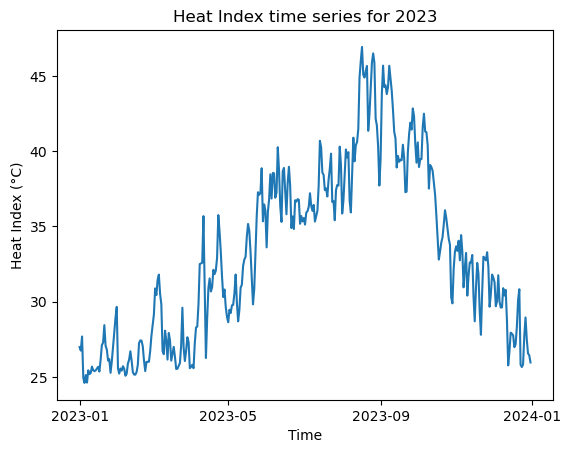

In [16]:
# 10. Produce a figure of the HI time series for 2023

from easy_mpl import plot
ax = plot(df_isd_daily['HI'], show=False,
          ax_kws=dict(
                    xlabel="Time",
                    ylabel="Heat Index (°C)",
                    title='Heat Index time series for 2023'))
plt.savefig(os.path.join(path, 'Heat_Index_time_series_2023'), dpi=300)
plt.show()

### Part 3
For Jeddah, based on CMIP6 models, the projected increase in air temperature from 1991–
2010 to 2081–2100 under the ‘middle-of-the-road’ SSP2-4.5 scenario is approximately 3°C.
To assess the potential impact of climate change on hot spells in Jeddah, apply this projected
warming to the air temperature data and recalculate the HI. What is the increase in
the highest HI value when this additional warming is considered?

In [17]:
df_isd_daily['RH'] = tools.dewpoint_to_rh(df_isd_daily['DEW'].values, df_isd_daily['TMP'].values)
df_isd_daily['HI'] = tools.gen_heat_index(df_isd_daily['TMP'].values, df_isd_daily['RH'].values)

highest_HI_before_PW = df_isd_daily['HI'].max()
df_isd_daily.max()

TMP    37.928125
DEW    27.545455
WND     6.334375
RH     77.519438
HI     46.972244
dtype: float64

In [18]:
df_isd_daily['TMP'] = df_isd_daily['TMP'] + 3
df_isd_daily['RH'] = tools.dewpoint_to_rh(df_isd_daily['DEW'].values, df_isd_daily['TMP'].values)
df_isd_daily['HI'] = tools.gen_heat_index(df_isd_daily['TMP'].values, df_isd_daily['RH'].values)

highest_HI_after_PW = df_isd_daily['HI'].max()
df_isd_daily.max()

TMP    40.928125
DEW    27.545455
WND     6.334375
RH     65.020241
HI     51.143322
dtype: float64

In [19]:
print(f'The increase in the highest HI value when this additional warming is considered: {highest_HI_after_PW - highest_HI_before_PW}')

The increase in the highest HI value when this additional warming is considered: 4.171077710383386
